# HW 4

## 2. Comparing Classifiers

### 2.1 Divorce Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv('data/marriage.csv', header = None)
data.rename(columns = {54: 'y'}, inplace = True)

# Split test/train data
X = data.iloc[:,0:54]
y = data.iloc[:,54:55]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4264)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(len(y_train)).astype(int)
y_test = np.array(y_test).reshape(len(y_test)).astype(int)

### Part A
Report testing accuracy for each of the three classifiers. Comment on their performance: which performs the best and make a guess why they perform the best in this setting.  

In [3]:
# Logistic Regression - from heart.py
lr_model = LogisticRegression(max_iter=200, solver='liblinear')
lr_model.fit(X_train, y_train)
lr_score_train = lr_model.score(X_train, y_train)
lr_score_test = lr_model.score(X_test, y_test)

print('Training Accuracy: ' + str(lr_score_train))
print('Test Accuracy: ' + str(lr_score_test))

Training Accuracy: 1.0
Test Accuracy: 0.9411764705882353


In [4]:
# KNN - from plot_classifier_comparison.py
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_score_train = knn.score(X_train, y_train)
knn_score_test = knn.score(X_test, y_test)

print('Training Accuracy: ' + str(knn_score_train))
print('Test Accuracy: ' + str(knn_score_test))

Training Accuracy: 0.9779411764705882
Test Accuracy: 0.9705882352941176


In [5]:
# Naive Bayes - from plot_classifier_comparison.py
naive_bayes = GaussianNB(var_smoothing=0.001)
naive_bayes.fit(X_train, y_train)
nb_score_train = naive_bayes.score(X_train, y_train)
nb_score_test = naive_bayes.score(X_test, y_test)
print('Training Accuracy: ' + str(nb_score_train))
print('Test Accuracy: ' + str(nb_score_test))

Training Accuracy: 0.9779411764705882
Test Accuracy: 0.9705882352941176


### Part B
Now perform PCA to project the data into two-dimensional space. Build the classifiers (Naive Bayes, Logistic Regression, and KNN) using the two-dimensional PCA results. Plot the data points and decision boundary of each classifier in the two-dimensional space. Comment on the difference between the decision boundary for the three classifiers. Please clearly represent the data points with different labels using different colors.

In [6]:
# Use PCA package to perform PCA
pca = PCA(n_components=2)
data_redux = pca.fit_transform(X)

# Split into test/train sets 
X_train, X_test, y_train, y_test = train_test_split(data_redux, y, test_size=0.2, random_state=4264)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train).reshape(len(y_train)).astype(int)
y_test = np.array(y_test).reshape(len(y_test)).astype(int)

In [7]:
# Logistic Regression - from heart.py
lr_model = LogisticRegression(max_iter=200, solver='liblinear')
lr_model.fit(X_train, y_train)
lr_score_train = lr_model.score(X_train, y_train)
lr_score_test = lr_model.score(X_test, y_test)

print('Training Accuracy: ' + str(lr_score_train))
print('Test Accuracy: ' + str(lr_score_test))

Training Accuracy: 0.9779411764705882
Test Accuracy: 0.9705882352941176


In [8]:
# KNN - from plot_classifier_comparison.py
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_score_train = knn.score(X_train, y_train)
knn_score_test = knn.score(X_test, y_test)

print('Training Accuracy: ' + str(knn_score_train))
print('Test Accuracy: ' + str(knn_score_test))

Training Accuracy: 0.9852941176470589
Test Accuracy: 0.9705882352941176


In [9]:
# Naive Bayes - from plot_classifier_comparison.py
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
nb_score_train = naive_bayes.score(X_train, y_train)
nb_score_test = naive_bayes.score(X_test, y_test)

print('Training Accuracy: ' + str(nb_score_train))
print('Test Accuracy: ' + str(nb_score_test))

Training Accuracy: 0.9779411764705882
Test Accuracy: 0.9705882352941176


Text(0.5, 1.0, 'Naive Bayes')

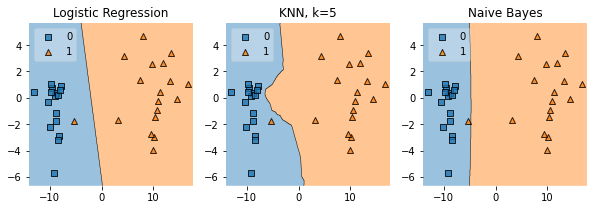

In [10]:
# http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 3)
fig = plt.figure(figsize=(10,3))

ax = plt.subplot(gs[0, 0])
fig = plot_decision_regions(X_test, y_test,  clf=lr_model, legend=2)
plt.title('Logistic Regression')

ax = plt.subplot(gs[0, 1])
fig = plot_decision_regions(X_test, y_test,  clf=knn, legend=2)
plt.title('KNN, k=5')

ax = plt.subplot(gs[0, 2])
fig = plot_decision_regions(X_test, y_test,  clf=naive_bayes, legend=2)
plt.title('Naive Bayes')

### 2.2 Handwriteen Digits Classification

(b) Comment on the performance of the classifier and give your explanation why some of them perform better than the others.



In [11]:
import scipy.io as spio
import random
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [12]:
# Import Data
mnist = spio.loadmat('data/mnist_10digits.mat',squeeze_me=True)

X_train = mnist['xtrain'] # each row is an image
X_test = mnist['xtest']
y_train = mnist['ytrain'].ravel()
y_test = mnist['ytest'].ravel()

# Standardize X_train and X_test
X_train = X_train/255
X_test = X_test/255

# Downsample
seed = 4624
index = random.sample(range(60000), 5000)

X_train_down = X_train[index]
y_train_down = y_train[index].ravel()

### Part A
Report confusion matrix, precision, recall, and F-1 score for each of the classifiers. For precision, recall, and F-1 score of each classifier, we will need to report these for each of the digits. So you can create a table for this. For this question, each of the 5 classifier, KNN, logistic regression, SVM, kernel SVM, and neural networks, accounts for 10 points.

In [14]:
# Tune KNN using GridSearchCV 
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

n_neighbors = list(range(1,30))

#Convert to dictionary
hyperparameters = dict(n_neighbors=n_neighbors)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train_down,y_train_down)

#Print The value of best Hyperparameters
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

# Current results = 1; previous results = 3

Best n_neighbors: 1


In [18]:
# from plot_classifier_comparison.py
names = ['KNN, k=3', 'Logistic Regression', 'SVM', 'Kernel SVM', 'Neural Networks']

classifiers = [KNeighborsClassifier(3), 
               LogisticRegression(solver='newton-cg'),
               SVC(kernel="linear"),
               SVC(kernel='rbf'),
               MLPClassifier(alpha=1, hidden_layer_sizes = (20, 10))
              ]

# Iterate over classifiers
for i in range(len(names)):
    clf_name = names[i]
    clf = classifiers[i]
       
    print(clf_name)
    
    # Fit the model
    if (clf_name == 'KNN, k=3') | (clf_name == 'SVM') | (clf_name == 'Kernel SVM'):
        clf.fit(X_train_down, y_train_down)
    else:
        clf.fit(X_train, y_train)
        
    # Predict Test Records 
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)
    
    # Accuracy 
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    print('Training Accuracy: ' + str(acc_train))
    print('Test Accuracy: ' + str(acc_test))
    
    # Scores 
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    print(classification_report(y_test, y_pred_test))
    
    # Confusion Matrix
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    print(confusion_matrix(y_test, y_pred_test))


KNN, k=3
Training Accuracy: 0.9363833333333333
Test Accuracy: 0.9366
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.90      1.00      0.94      1135
           2       0.97      0.91      0.94      1032
           3       0.92      0.93      0.92      1010
           4       0.95      0.91      0.93       982
           5       0.93      0.91      0.92       892
           6       0.96      0.97      0.97       958
           7       0.94      0.94      0.94      1028
           8       0.97      0.87      0.92       974
           9       0.91      0.93      0.92      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

[[ 966    1    1    0    0    3    7    1    1    0]
 [   0 1130    1    1    1    1    1    0    0    0]
 [  16   32  937    9    5    1    3   21    8    0]
 [   3   11  